In [7]:
import random
from chapter_6_probability import inverse_normal_cdf
from chapter_10_working_with_data import *
from chapter_5_statistics import correlation

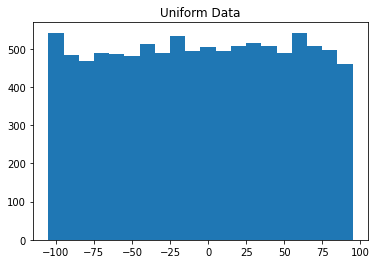

In [8]:
random.seed(0)
uniform_data = [200 * random.random() - 100 for _ in range(10000)]
normal_data = [57 * inverse_normal_cdf(random.random()) for _ in range(10000)]
plot_histogram(uniform_data, 10, "Uniform Data")

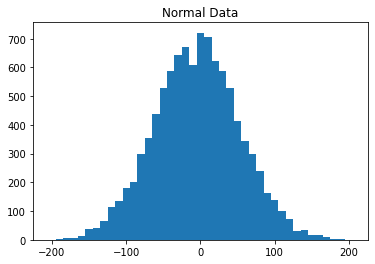

In [9]:
plot_histogram(normal_data, 10, "Normal Data")

Text(0.5, 1.0, 'Plotting 2D ys')

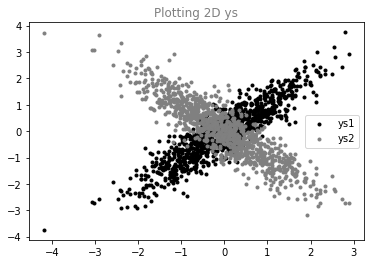

In [10]:
xs = [random_normal() for _ in range(1000)]
ys1 = [x + random_normal() / 2 for x in xs]
ys2 = [-x + random_normal() / 2 for x in xs]
plt.scatter(xs, ys1, marker=".", color="black", label="ys1")
plt.scatter(xs, ys2, marker=".", color="gray", label="ys2")
plt.legend()
plt.title("Plotting 2D ys", color="gray")

In [11]:
print(correlation(xs, ys1))

variance -0.027230527385386116


ValueError: math domain error

In [12]:
print(correlation(xs, ys2))

variance -0.027230527385386116


ValueError: math domain error

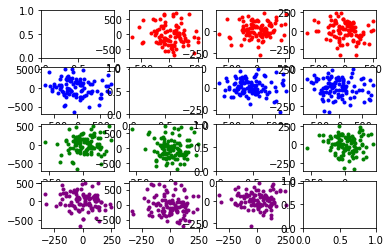

In [13]:
d1 = [2*random_normal()*100 + 3 for _ in range(100)]
d2 = [-3*random_normal()*100 + 5  for _ in range(100)]
d3 = [random_normal()*100 for _ in range(100)]
d4 = [-random_normal()*100 for _ in range(100)]
corr_data = [d1, d2, d3, d4]
num_vectors = len(corr_data)
fig, ax = plt.subplots(num_vectors, num_vectors)
colors = ['red', 'blue', 'green', 'purple']

for i in range(num_vectors):
    for j in range(num_vectors):
        if i != j: ax[i][j].scatter(corr_data[i], corr_data[j], marker='.', color=colors[i])

plt.show()  

In [14]:
import datetime
from collections import namedtuple
from typing import NamedTuple

# WORSE (arguably)
stock_price = {
    'closing_price': 102.05,
    'date': datetime.date(2014, 8, 29),
    'symbol': 'AAPL'
}

# BETTER

class StockPrice(NamedTuple):
    symbol: str
    date: datetime.date
    closing_price: float
    
    def is_high_tech(self) -> bool:
        return self.symbol in ['MSFT', 'GOOG', 'FB', 'AMZN', 'AAPL']
            
price = StockPrice('MSFT', datetime.date(2018, 12, 14), 106.03)

assert price.symbol == 'MSFT'
assert price.closing_price == 106.03
assert price.is_high_tech()

In [15]:
from dataclasses import dataclass

@dataclass
class StockPrice2:
    symbol: str
    name: str
    five_year: float
    ten_year: float
    fifteen_year: float
    twenty_year: float
    
    def is_high_tech(self) -> bool:
        return self.symbol in ['MSFT', 'GOOG', 'FB', 'AMZN', 'AAPL']
    
price2 = StockPrice2('MSFT', datetime.date(2018, 12, 14), 10.00, 20.00, 30.00, 40.00)

assert price2.symbol == 'MSFT'
assert price2.twenty_year == 40.00
assert price2.is_high_tech()

In [16]:
price2.twenty_year /= 2
assert price2.twenty_year == 20.00

In [17]:
import csv
import re

def parse_dollar_val(x) -> str:
    try:
        return float(x[1:]) # string leading '$'
    except:
        return None

with open("stock_prices.csv", newline="") as file:
    reader = csv.reader(file)
    clean = []
    next(reader) # Skip first line / header
    for row in reader:
        symbol, name, five_year, ten_year, fifteen_year, twenty_year = row
        five_year = parse_dollar_val(five_year)
        ten_year = parse_dollar_val(ten_year)
        fifteen_year = parse_dollar_val(fifteen_year)
        twenty_year = parse_dollar_val(twenty_year)
                
        # If no symbol, skip this row
        if not re.match(r"^[A-Z]+$", symbol):
            next()
        
        clean.append(StockPrice2(symbol, name, five_year, ten_year, fifteen_year, twenty_year))

print(clean)

[StockPrice2(symbol='AMEX', name='American Stock Exchange', five_year=12.5, ten_year=25.0, fifteen_year=37.5, twenty_year=50.0), StockPrice2(symbol='ASX', name='Australian Securities Exchange', five_year=25.0, ten_year=50.0, fifteen_year=75.0, twenty_year=100.0), StockPrice2(symbol='CBOT', name='Chicago Board of Trade', five_year=10.0, ten_year=20.0, fifteen_year=30.0, twenty_year=40.0), StockPrice2(symbol='CFE', name='Chicago Futures Exchange', five_year=10.0, ten_year=20.0, fifteen_year=30.0, twenty_year=40.0), StockPrice2(symbol='CME', name='Chicago Merchantile Exchange', five_year=10.0, ten_year=20.0, fifteen_year=30.0, twenty_year=40.0), StockPrice2(symbol='COMEX', name='New York Commodity Exchange', five_year=10.0, ten_year=20.0, fifteen_year=30.0, twenty_year=40.0), StockPrice2(symbol='EUREX', name='EUREX Futures Exchange', five_year=10.0, ten_year=None, fifteen_year=None, twenty_year=None), StockPrice2(symbol='FOREX', name='Foreign Exchange', five_year=25.0, ten_year=50.0, fift

In [18]:
from dateutil.parser import parse
from typing import List, Optional
import re

def try_parse_row(row: List[str]) -> Optional[StockPrice]:
    symbol, date_, closing_price_ = row
    
    if not re.match(r"^[A-Z]+$", symbol):
        return None
    
    try:
        date = parse(date_).date()
    except ValueError:
        return None
    
    try:
        closing_price = float(closing_price_)
    except ValueError:
        return None
    
    return StockPrice(symbol, date, closing_price)

In [19]:
import csv

data: List[StockPrice] = []

with open("comma_delimited_stock_prices.csv") as f:
    reader = csv.reader(f)
    for row in reader:
        maybe_stock = try_parse_row(row)
        if maybe_stock is None:
            print(f'Skipping row {row}')
        else:
            data.append(maybe_stock)

max_aapl_price = max(stock_price.closing_price for stock_price in data if stock_price.symbol == 'AAPL')
print(max_aapl_price)

Skipping row ['MSFT', '6/19/2014', 'n/a']
91.86


In [20]:
from pprint import PrettyPrinter
from typing import Dict
from collections import defaultdict

pp = PrettyPrinter(indent=4)
max_prices: Dict[str, float] = defaultdict(lambda: float('-inf'))

for sp in data:
    symbol, closing_price = sp.symbol, sp.closing_price
    if closing_price > max_prices[symbol]:
        max_prices[symbol] = closing_price

print(max_prices)

defaultdict(<function <lambda> at 0x7fe011f91550>, {'AAPL': 91.86, 'MSFT': 41.68, 'FB': 64.5})


In [33]:
prices: Dict[str, List[StockPrice]] = defaultdict(list)

for sp in data:
    prices[sp.symbol].append(sp)

# sort by date (honestly I'm not sure how this works)
prices = {symbol: sorted(symbol_prices) for symbol, symbol_prices in prices.items()}

pp.pprint(prices)
def pct_change(yesterday: StockPrice, today: StockPrice) -> float:
    return today.closing_price / yesterday.closing_price - 1

class DailyChange(NamedTuple):
    symbol: str
    date: datetime.date
    pct_change: float

def day_over_day_changes(prices: List[StockPrice]) -> List[DailyChange]:
    """Assumes prices are for single stock and in order"""
    return [DailyChange(symbol=today.symbol,
                        date=today.date,
                        pct_change=pct_change(yesterday,today)
                       ) for yesterday, today in zip(prices, prices[1:])]

all_changes = [change
              for symbol_prices in prices.values()
              for change in day_over_day_changes(symbol_prices)]
pp.pprint(all_changes)
max_change = max(all_changes, key=lambda change: change.pct_change)
min_change = min(all_changes, key=lambda change: change.pct_change)

{   'AAPL': [   StockPrice(symbol='AAPL', date=datetime.date(2014, 6, 19), closing_price=91.86),
                StockPrice(symbol='AAPL', date=datetime.date(2014, 6, 20), closing_price=90.91)],
    'FB': [   StockPrice(symbol='FB', date=datetime.date(2014, 6, 19), closing_price=64.34),
              StockPrice(symbol='FB', date=datetime.date(3014, 6, 20), closing_price=64.5)],
    'MSFT': [   StockPrice(symbol='MSFT', date=datetime.date(2014, 6, 20), closing_price=41.68)]}
[   DailyChange(symbol='AAPL', date=datetime.date(2014, 6, 20), pct_change=-0.0103418245155672),
    DailyChange(symbol='FB', date=datetime.date(3014, 6, 20), pct_change=0.0024867889337891746)]
